In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [10]:
df = pd.read_csv(r'C:\Users\Eduardo\Exercises Machine Learning\FuelConsumptionCo2.csv')

In [11]:
da = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

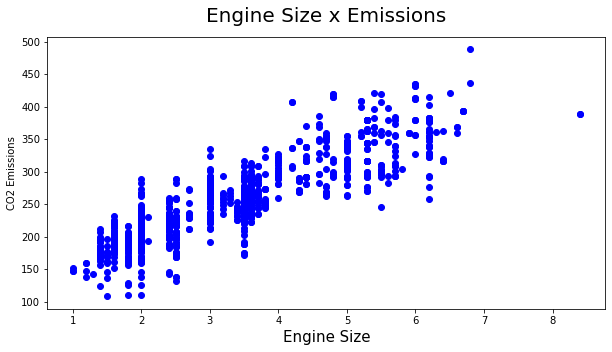

In [18]:
plt.figure(figsize = (10, 5))
plt.scatter(da.ENGINESIZE, da.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size", fontsize = 15)
plt.ylabel('CO2 Emissions')
plt.title('Engine Size x Emissions', fontsize = 20, pad = 15)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(da, test_size = 0.2)

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures (degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  5.4 , 29.16],
       ...,
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  1.5 ,  2.25]])

In [26]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

print ('Coefficients: ', clf.coef_)
print ('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         50.05076344 -1.40455894]]
Intercept:  [107.33295729]


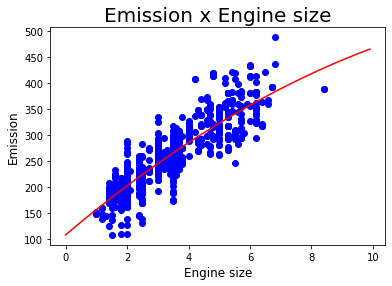

In [46]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*xx+ clf.coef_[0][2]*np.power(xx,2)
plt.plot(xx,yy, '-r')
plt.xlabel('Engine size', fontsize = 12)
plt.ylabel('Emission', fontsize = 12)
plt.title('Emission x Engine size', fontsize = 20)
plt.show()

In [47]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 21.36
Residual sum of squares (MSE): 844.04
R2-score: 0.78


In [50]:
cubic = PolynomialFeatures (degree=3)
train_x_cubic = cubic.fit_transform(train_x)
train_x_cubic

array([[  1.   ,   2.4  ,   5.76 ,  13.824],
       [  1.   ,   2.   ,   4.   ,   8.   ],
       [  1.   ,   5.4  ,  29.16 , 157.464],
       ...,
       [  1.   ,   2.5  ,   6.25 ,  15.625],
       [  1.   ,   3.   ,   9.   ,  27.   ],
       [  1.   ,   1.5  ,   2.25 ,   3.375]])

In [52]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_cubic, train_y)

print ('Coefficients: ', clf.coef_)
print ('Intercept: ', clf.intercept_)

Coefficients:  [[ 0.         29.43919325  4.24069457 -0.46548966]]
Intercept:  [129.36440728]


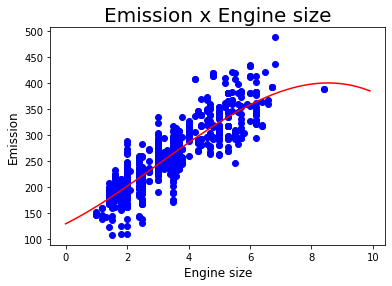

In [55]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
xx = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*xx+ clf.coef_[0][2]*np.power(xx,2) + clf.coef_[0][3]*np.power(xx,3)
plt.plot(xx,yy, '-r')
plt.xlabel('Engine size', fontsize = 12)
plt.ylabel('Emission', fontsize = 12)
plt.title('Emission x Engine size', fontsize = 20)
plt.show()

In [56]:
from sklearn.metrics import r2_score

test_x_cubic = cubic.fit_transform(test_x)
test_y_ = clf.predict(test_x_cubic)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 21.30
Residual sum of squares (MSE): 841.60
R2-score: 0.78
